In [1]:
!pip install praw

In [2]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [3]:
user_agent = "web:CS579:v1.0 (by u/Relevant-Fig-773)"

reddit = praw.Reddit(
    client_id="qy6TBi9qSnML8nLApahmvg",
    client_secret="_TjZdio3jXn7Gpy6e2ABszjNIBX02w",
    user_agent=user_agent,
)

In [4]:
import networkx as nx
import json

subreddit = reddit.subreddit("championsleague")
commenters = []
post_makers = []
directed_graph = nx.DiGraph()
undirected_graph = nx.Graph()
raw_data = {}

# Fetch data from top hot posts and their comments
for submission in subreddit.hot(limit=20):
    # Add the original post as the center node
    submission_author = str(submission.author)
    directed_graph.add_node(submission_author, title=submission.title, type="post")
    undirected_graph.add_node(submission_author, title=submission.title, type="post")

    # Add submission author to raw_data dictionary
    if submission_author not in raw_data:
        raw_data[submission_author] = []

    post_makers.append(submission_author)

    # Iterate through comments on the post
    for comment in submission.comments:
        # Check if the comment has a valid author
        if comment.author:
            comment_author = str(comment.author)
            commenters.append(comment_author)

            # Add each commenting user as a node and connect them to the post
            directed_graph.add_node(comment_author, type="user")
            directed_graph.add_edge(comment_author, submission_author)

            undirected_graph.add_node(comment_author, type="user")
            undirected_graph.add_edge(comment_author, submission_author)

            # Append comment author to raw_data dictionary under submission author
            raw_data[submission_author].append(comment_author)

# Write raw_data dictionary to a file
with open("RAW_DATA.json", "w") as file:
    json.dump(raw_data, file)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [5]:
for u in commenters:
  print(u)

AutoModerator
ecross02
SeanContent
Sovereign444
AutoModerator
AutoModerator
Ukee_boy
AutoModerator
evansyakah
Bobberino94
Sad_Astronaut_7235
AutoModerator
Bt12v
AutoModerator
Positive_Big_2153
Mahery92
digitalfoe
doctorweiwei
Ok_Standard_3559
AutoModerator
Stunning_Web3509
SoerkelOne
AutoModerator
AutoModerator
AutoModerator
baldurcan
Whole-Ad-8494
Whole-Ad-8494
BenitoCamelas69420
No-Percentage-3380
AutoModerator
Felicks77
hector_cumbaya
Karman_K
Maleficent_Resolve44
Working_Radish_2726
Different-Attorney76
CrazyCockroachLady
AutoModerator
AutoModerator
Automatic_Taro6005
Pow67
Kyyes
suchmos1
Lazywhale97
GuyIncognito211
CalTono
chrislpz
Small_Blueberry_7313
Mindless_Kenshi08
Ces_noix
Lifelemons9393
vegass67
Lermoninoff
souhailMeme
Hristianm
sufinomo
Dazzling-Yellow5395
DistinctRub2962
TheColoredFool
matheusaugomes
ElBravooo
pvt0
NUbeebskies
XuloMalacatones
ShouldersofGiants127
Wide_Challenge3880
fedenl
Joe1237
Vigotje123
killing_myvibe
DistinctRub2962
citizen2211994
king_dave11
Unlucky

In [6]:
for p in post_makers:
  print(p)

pumkinhat
Football_Discussions
cyclethepuck1
cyclethepuck1
aham_brahmasami
Icy_Independence7094
Football_Discussions
cyclethepuck1
cyclethepuck1
Football_Discussions
MessageOriginal7808
Football_Discussions
Single-Revenue-6587
OnGyattt
OnGyattt
Lizasugarluw
Football_Discussions
Football_Discussions
OnGyattt
Hopeful-Monk4959


In [7]:
print(len(commenters), len(set(commenters)))
print(len(post_makers), len(set(post_makers)))

all_users = post_makers + commenters
print(len(all_users), len(set(all_users)))

### checks number of nodes in graph is same as
###     number of unique users in post+comments
#assert len(set(all_users)) == len(G.nodes)

224 181
20 10
244 190


In [8]:
print(f"Size of network: {(len(undirected_graph.nodes))} nodes")
print(f"Size of network: {(len(undirected_graph.edges))} edges")

Size of network: 190 nodes
Size of network: 211 edges


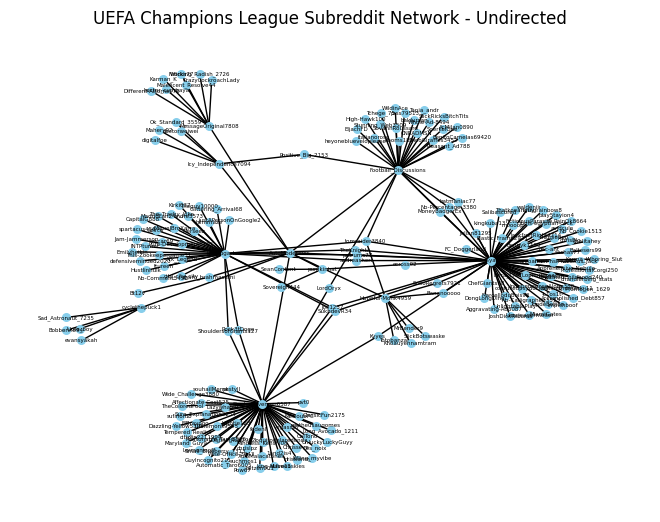

In [9]:
# Visualize the graph
pos = nx.spring_layout(undirected_graph)
nx.draw(undirected_graph, pos, with_labels=True, font_size=4, node_size=30, node_color='skyblue', font_color="black")
plt.title("UEFA Champions League Subreddit Network - Undirected")
plt.show()

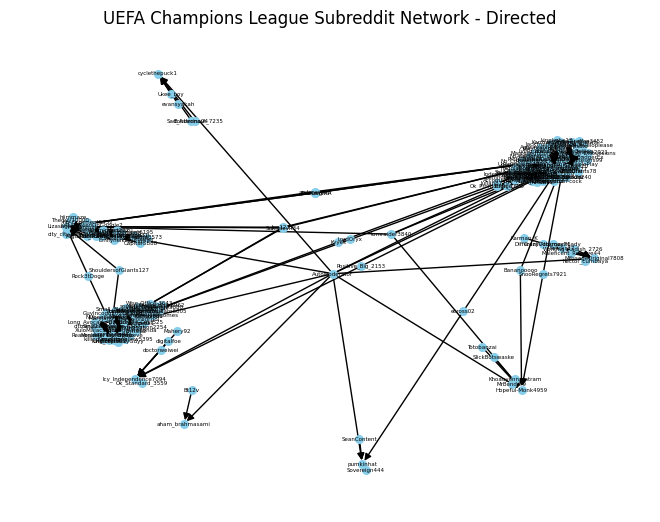

In [10]:
# Visualize the graph
pos = nx.spring_layout(directed_graph)
nx.draw(directed_graph, pos, with_labels=False, font_size=4, node_size=30, node_color='skyblue', font_color="black")
plt.title("UEFA Champions League Subreddit Network - Directed")
plt.show()

# Network Metrics

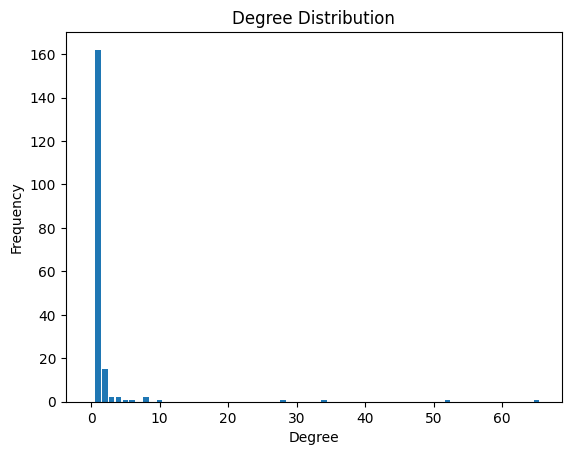

Degree Distribution: [0, 162, 15, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Network Measures:
Average Clustering Coefficient: 0.016865896043527624
Pagerank:
  pumkinhat: 0.009022651773337808
  AutoModerator: 0.020066055421956816
  ecross02: 0.00453380137518502
  SeanContent: 0.002707157401145079
  Sovereign444: 0.002707157401145079
  Football_Discussions: 0.05982483510279246
  cyclethepuck1: 0.012271752633189715
  Ukee_boy: 0.002876067669914391
  evansyakah: 0.002876067669914391
  Bobberino94: 0.002876067669914391
  Sad_Astronaut_7235: 0.002876067669914391
  aham_brahmasami: 0.00495610264239092
  Bt12v: 0.0028961965160096506
  Icy_Independence7094: 0.013721221426168663
  Positive_Big_2153: 0.004550022487328018
  Mahery92: 0.0027336624924604014
  digitalfoe: 0.0027336624924604014
  doctorweiwei: 0.0027336624924604014
  Ok_Standard_3559: 0.00

In [13]:
# Calculate network measures
degree_distribution = nx.degree_histogram(undirected_graph)

# Plot Degree Distribution
plt.bar(range(len(degree_distribution)), degree_distribution, align="center")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Print Degree Distribution (if needed)
print("Degree Distribution:", degree_distribution)

# Calculate other network measures
clustering_coefficient = nx.average_clustering(undirected_graph)
pagerank = nx.pagerank(undirected_graph)
diameter = nx.diameter(undirected_graph)
closeness_centrality = nx.closeness_centrality(undirected_graph)
betweenness_centrality = nx.betweenness_centrality(undirected_graph)

# Print other measures
print("\nNetwork Measures:")
print("Average Clustering Coefficient:", clustering_coefficient)
print("Pagerank:")
for node, value in pagerank.items():
    print(f"  {node}: {value}")
print("Diameter:", diameter)
print("Closeness Centrality:")
for node, value in closeness_centrality.items():
    print(f"  {node}: {value}")
print("Betweenness Centrality:")
for node, value in betweenness_centrality.items():
    print(f"  {node}: {value}")